In [1]:
import pandas as pd

In [67]:
# save filepath to variable for easier access
melbourne_file_path = 'melb_data.csv'
# read the data and store data in DataFrame titled melbourne_data
melbourne_data = pd.read_csv(melbourne_file_path)
melbourne_data = melbourne_data.dropna(axis=0)
# print a summary of the data in Melbourne data
print(melbourne_data.describe())

         Unnamed: 0        Rooms         Price     Distance     Postcode  \
count   6196.000000  6196.000000  6.196000e+03  6196.000000  6196.000000   
mean    9632.061491     2.931407  1.068828e+06     9.751097  3101.947708   
std     5743.219058     0.971079  6.751564e+05     5.612065    86.421604   
min        2.000000     1.000000  1.310000e+05     0.000000  3000.000000   
25%     4544.750000     2.000000  6.200000e+05     5.900000  3044.000000   
50%     9346.500000     3.000000  8.800000e+05     9.000000  3081.000000   
75%    14544.750000     4.000000  1.325000e+06    12.400000  3147.000000   
max    19739.000000     8.000000  9.000000e+06    47.400000  3977.000000   

          Bedroom2     Bathroom          Car      Landsize  BuildingArea  \
count  6196.000000  6196.000000  6196.000000   6196.000000   6196.000000   
mean      2.902034     1.576340     1.573596    471.006940    141.568645   
std       0.970055     0.711362     0.929947    897.449881     90.834824   
min       0

In [58]:
melbourne_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6196 entries, 1 to 15395
Data columns (total 22 columns):
Unnamed: 0       6196 non-null int64
Suburb           6196 non-null object
Address          6196 non-null object
Rooms            6196 non-null int64
Type             6196 non-null object
Price            6196 non-null float64
Method           6196 non-null object
SellerG          6196 non-null object
Date             6196 non-null object
Distance         6196 non-null float64
Postcode         6196 non-null float64
Bedroom2         6196 non-null float64
Bathroom         6196 non-null float64
Car              6196 non-null float64
Landsize         6196 non-null float64
BuildingArea     6196 non-null float64
YearBuilt        6196 non-null float64
CouncilArea      6196 non-null object
Lattitude        6196 non-null float64
Longtitude       6196 non-null float64
Regionname       6196 non-null object
Propertycount    6196 non-null float64
dtypes: float64(12), int64(2), object(8)
memor

In [3]:
print(melbourne_data.columns)

Index(['Unnamed: 0', 'Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method',
       'SellerG', 'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom',
       'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea',
       'Lattitude', 'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')


In [4]:
melbourne_data.shape

(6196, 22)

In [42]:
melbourne_data.Price.head()

1    1035000.0
2    1465000.0
4    1600000.0
6    1876000.0
7    1636000.0
Name: Price, dtype: float64

In [5]:
# store the series of prices separately as melbourne_price_data.
melbourne_price_data = melbourne_data.Price
# the head command returns the top few lines of data.
print(melbourne_price_data.head())

1    1035000.0
2    1465000.0
4    1600000.0
6    1876000.0
7    1636000.0
Name: Price, dtype: float64


In [6]:
columns_of_interest = ['Landsize', 'BuildingArea']
two_columns_of_data = melbourne_data[columns_of_interest]
two_columns_of_data.describe()

,Landsize,BuildingArea
count,6196.000000,6196.000000
mean,471.006940,141.568645
std,897.449881,90.834824
min,0.000000,0.000000
25%,152.000000,91.000000
50%,373.000000,124.000000
75%,628.000000,170.000000
max,37000.000000,3112.000000


# Building the Model

In [65]:
# save filepath to variable for easier access
melbourne_file_path = 'train.csv'
# read the data and store data in DataFrame titled melbourne_data
melbourne_data = pd.read_csv(melbourne_file_path)
# melbourne_data = melbourne_data.dropna(axis=0)
# print a summary of the data in Melbourne data
# print(melbourne_data.describe())
# print(melbourne_data.info())

In [69]:
y = melbourne_data.Price # The Target

#The attributes to predict
melbourne_predictors = ['Rooms', 'Bathroom', 'Landsize', 'BuildingArea', 
                        'YearBuilt', 'Lattitude', 'Longtitude']

X = melbourne_data[melbourne_predictors]#the predictors dataset


In [55]:
from sklearn.tree import DecisionTreeRegressor

# Define model
melbourne_model = DecisionTreeRegressor()
# melbourne_model = DecisionTreeRegressor(max_leaf_nodes=8, min_samples_leaf=200)

# Fit model
melbourne_model.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [28]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import os, sys

from sklearn import tree

def conda_fix(graph):
        path = os.path.join(sys.base_exec_prefix, "Library", "bin", "graphviz")
        paths = ("dot", "twopi", "neato", "circo", "fdp")
        paths = {p: os.path.join(path, "{}.exe".format(p)) for p in paths}
        graph.set_graphviz_executables(paths)

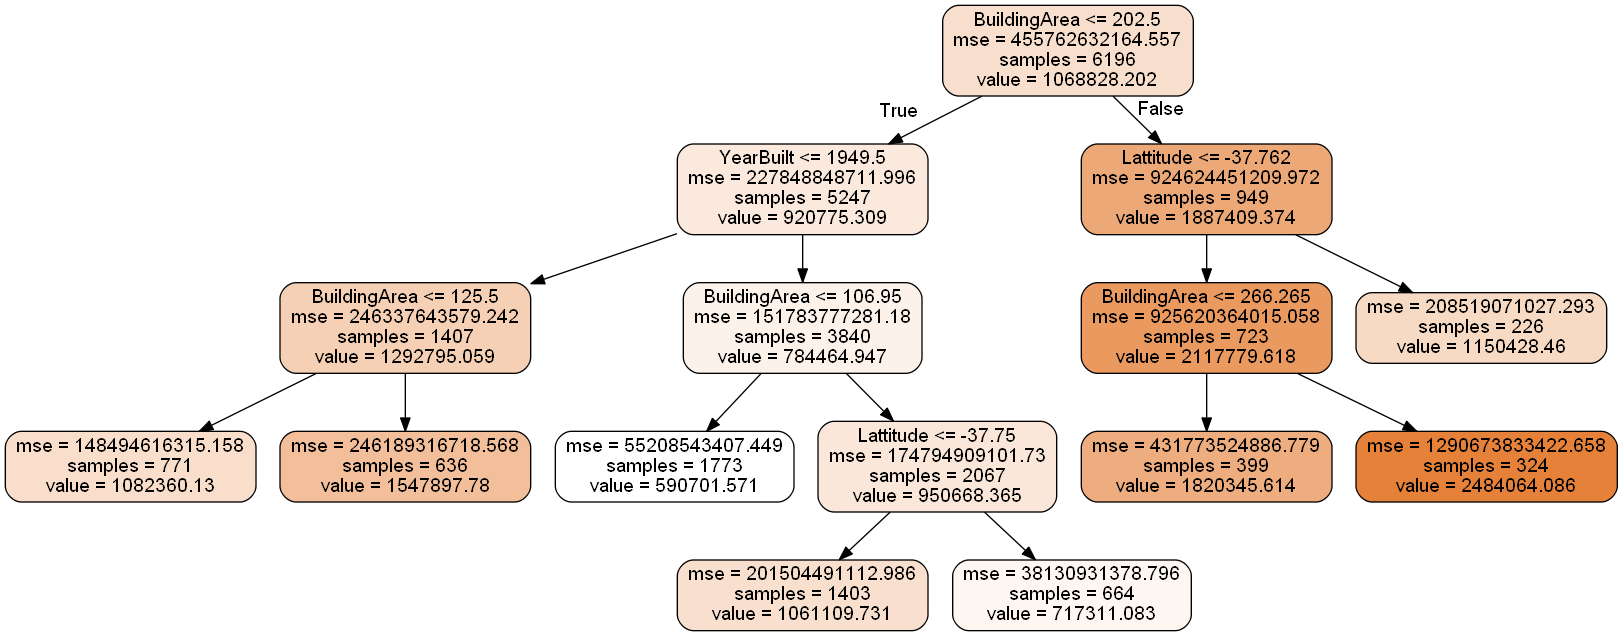

In [38]:
# tree.export_graphviz(melbourne_model, out_file='tree.dot') #print dotfile

dot_data = StringIO()
tree.export_graphviz(melbourne_model, out_file=dot_data, feature_names =melbourne_predictors,filled=True, rounded=True)
# print(dot_data.getvaslue())
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
conda_fix(graph)
graph.write_pdf("pydot_try.pdf")
Image(graph.create_png())

# Predicting

In [57]:
print("Making predictions for the following 5 houses:")
print(X.head())
# X.head()
print("The predictions are")
print(melbourne_model.predict(X.head()))
print('True Prices')
print(Y.head())

Making predictions for the following 5 houses:
   Rooms  Bathroom  Landsize  BuildingArea  YearBuilt  Lattitude  Longtitude
1      2       1.0     156.0          79.0     1900.0   -37.8079    144.9934
2      3       2.0     134.0         150.0     1900.0   -37.8093    144.9944
4      4       1.0     120.0         142.0     2014.0   -37.8072    144.9941
6      3       2.0     245.0         210.0     1910.0   -37.8024    144.9993
7      2       1.0     256.0         107.0     1890.0   -37.8060    144.9954
The predictions are
[1035000. 1465000. 1600000. 1876000. 1636000.]
True Prices
1    1035000.0
2    1465000.0
4    1600000.0
6    1876000.0
7    1636000.0
Name: Price, dtype: float64


# Model Validation

In [45]:
from sklearn.metrics import mean_absolute_error

predicted_home_prices = melbourne_model.predict(X)
mean_absolute_error(y, predicted_home_prices)

434.71594577146544

In [71]:
from sklearn.model_selection import train_test_split

# split data into training and validation data, for both predictors and target
# The split is based on a random number generator. Supplying a numeric value to
# the random_state argument guarantees we get the same split every time we
# run this script.
train_X, val_X, train_y, val_y = train_test_split(X, y,random_state = 0)
# Define model
melbourne_model = DecisionTreeRegressor()
# Fit model
melbourne_model.fit(train_X, train_y)

# get predicted prices on validation data
val_predictions = melbourne_model.predict(val_X)
print(mean_absolute_error(val_y, val_predictions))

258007.26468689478


In [79]:
print("Making predictions for the following 5 houses:")
print(train_X.head())
# train_X.head()
print("The predictions are")
print(melbourne_model.predict(val_X.head()))
print('True Prices')
print(val_y.head())

Making predictions for the following 5 houses:
       Rooms  Bathroom  Landsize  BuildingArea  YearBuilt  Lattitude  \
13292      3       1.0     206.0         110.0     1980.0  -37.87107   
7404       2       1.0       0.0          73.0     2000.0  -37.85900   
10789      2       1.0    2701.0          79.0     2011.0  -37.81090   
8496       3       1.0     670.0         116.0     1940.0  -37.81340   
1041       6       3.0     708.0         275.0     1988.0  -37.91810   

       Longtitude  
13292   145.04991  
7404    144.97670  
10789   144.86840  
8496    144.87450  
1041    145.04400  
The predictions are
[ 937500.  550000. 1182500. 1230000.  910000.]
True Prices
6184      815000.0
2984      655000.0
12911     957500.0
4639     1330000.0
6287      722000.0
Name: Price, dtype: float64


# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest_model = RandomForestRegressor()
forest_model.fit(train_X, train_y)
melb_preds = forest_model.predict(val_X)
print(mean_absolute_error(val_y, melb_preds))